<a href="https://colab.research.google.com/github/ROHAN010501/customer_segmentation_clustering/blob/main/customer_segmentation_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation: Clustering 🛒🛒

#### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn import metrics

#### Loading the dataset

In [ ]:
df0 = pd.read_csv(r"C:\ml_datasets\marketing_campaign.csv", sep="\t")
df = df0.copy()

In [ ]:
#viewing first 5 rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#viewing last 5 rows
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


#### Cleaning the Dataset

In [ ]:
#dataset dimensions
df.shape

(2240, 29)

In [ ]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Here we can clearly see that the column 'Income' have some missing values and the 'Dt_Customer' column is not in datetime format.


In [ ]:
#dropping the null values
df.dropna(inplace=True)

In [ ]:
#converting the format of "Dt_Customer" from object to datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='%d-%m-%Y')

In [ ]:
#data description
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417


In [ ]:
#again checking for null values
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#dataframe data types
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [ ]:
#getting unique values
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

#### Feature Engineering

In [ ]:
#creating new features
#current age
df["Age"] = 2024 - df["Year_Birth"]

In [ ]:
#creating a field for total spent
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [ ]:
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [ ]:
#creating a field 'Living with' from marital status
df["Living_With"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone",
                                                  "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})

In [ ]:
#creating field for total childrens
df["Children"] = df["Kidhome"] + df["Teenhome"]

In [ ]:
#creating a feature to show the customer enrollment in company
df["Customer_For"] = df["Dt_Customer"].max() - df["Dt_Customer"]
df["Customer_For"] = df["Customer_For"].dt.days

In [ ]:
#new feature for total no. of family members
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2}) + df["Children"]

In [ ]:
#feature to show if customer is parent
df["Is_Parent"] = np.where(df["Children"] > 0, 1, 0)

In [ ]:
#creating three groups for Education
df["Education"] = df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate",
                                           "Master":"Postgraduate", "PhD":"Postgraduate"})

In [ ]:
#renaming the columns
df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold"}, inplace=True)

In [ ]:
#dropping unnecessary columns
df.drop(["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1, inplace=True)

In [ ]:
#Creating a feature to get a sum of accepted promotions
df["Total_Promos"] = df["AcceptedCmp1"]+df["AcceptedCmp2"]+df["AcceptedCmp3"]+df["AcceptedCmp4"]+df["AcceptedCmp5"]

In [ ]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp2,Complain,Response,Age,Spent,Children,Customer_For,Family_Size,Is_Parent,Total_Promos
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.013538,0.009477,0.150271,55.179603,607.075361,0.947202,353.521209,2.592509,0.714350,0.298285
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,202.434667,0.905722,0.451825,0.679209
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,47.000000,69.000000,0.000000,180.000000,2.000000,0.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,54.000000,396.500000,1.000000,355.500000,3.000000,1.000000,0.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,65.000000,1048.000000,1.000000,529.000000,3.000000,1.000000,0.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,131.000000,2525.000000,3.000000,699.000000,5.000000,1.000000,4.000000


Here we can see there are some outliiers in the data we need to remove them.


#### Checking and removing Outliers

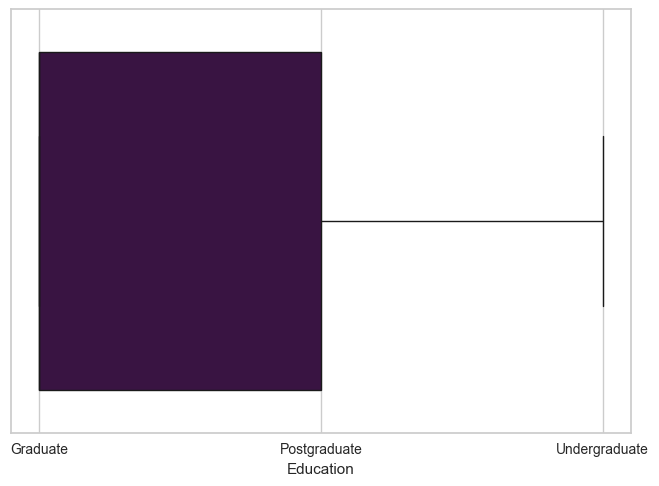

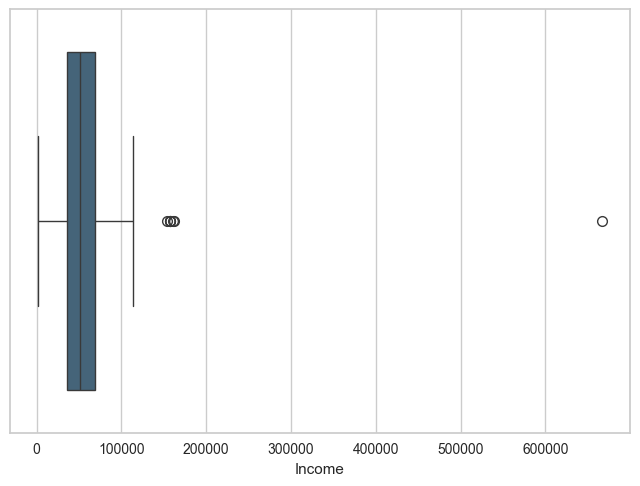

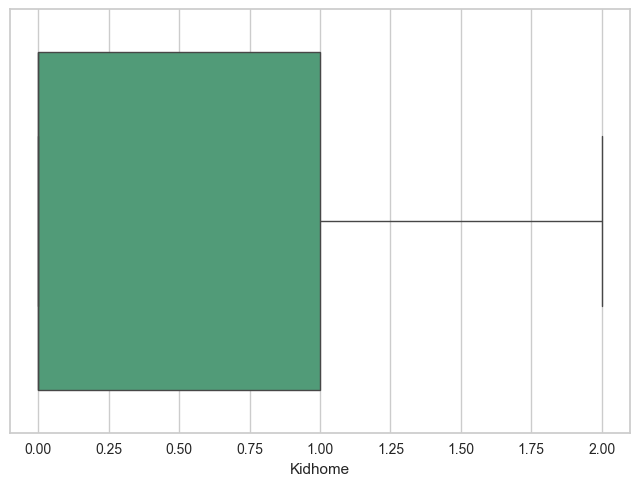

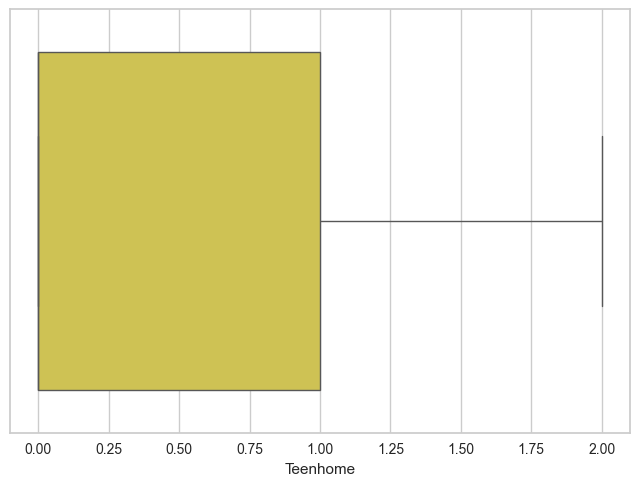

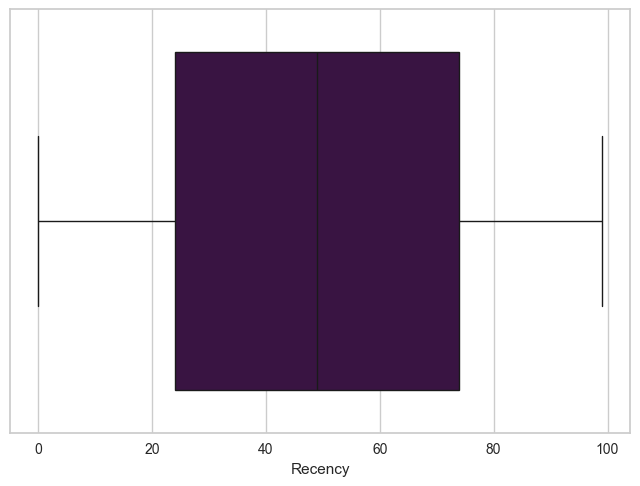

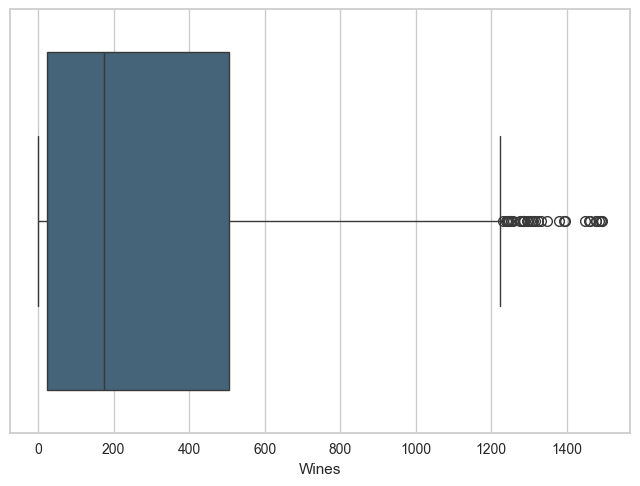

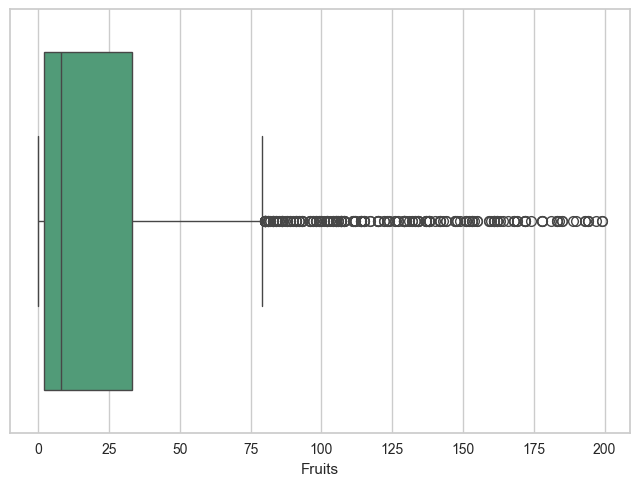

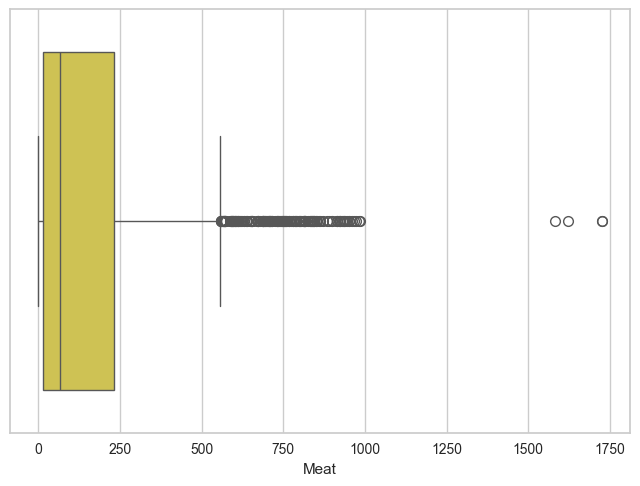

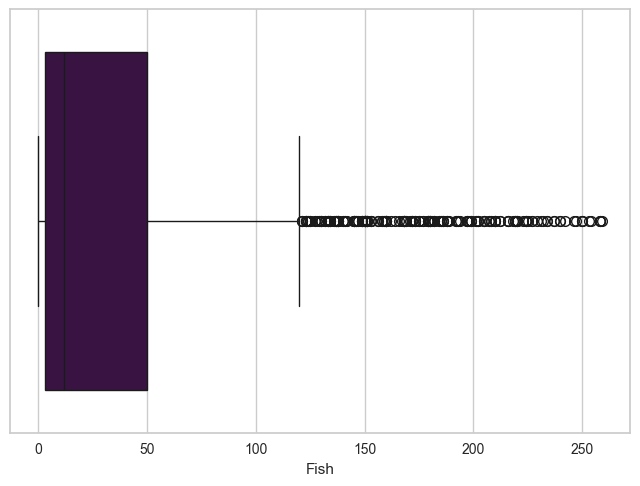

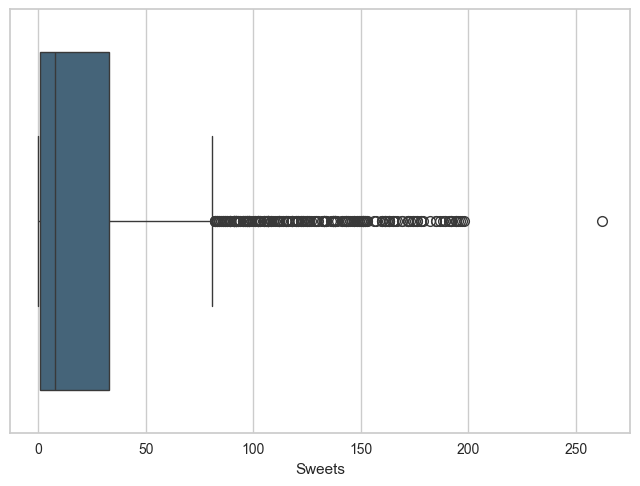

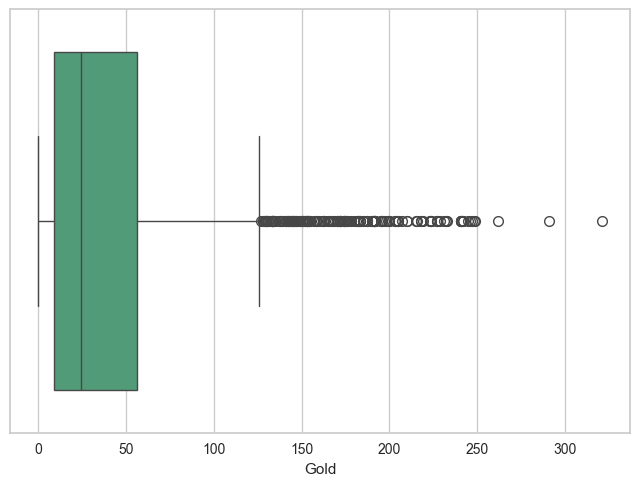

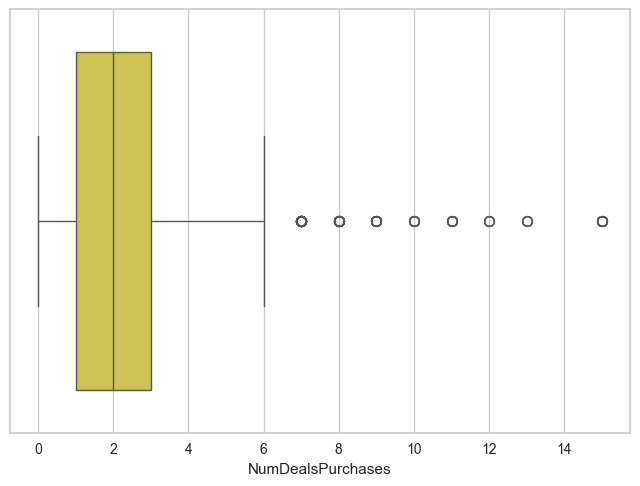

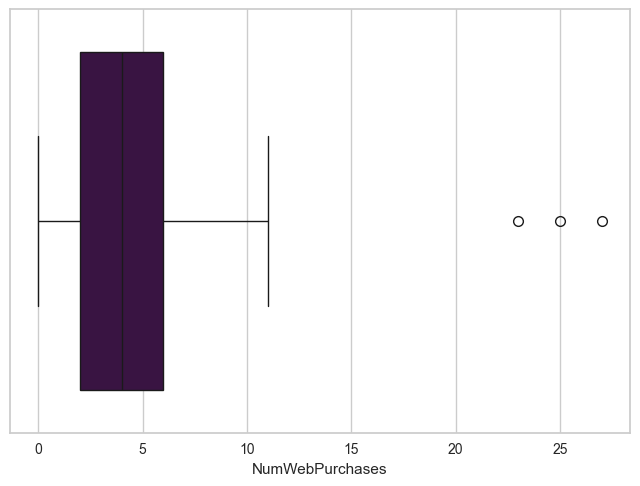

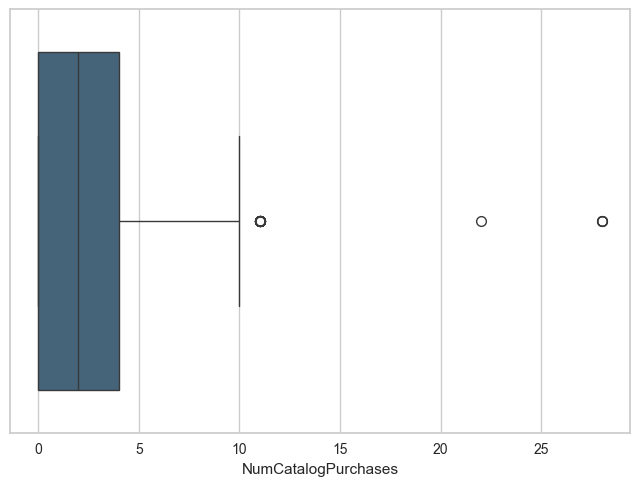

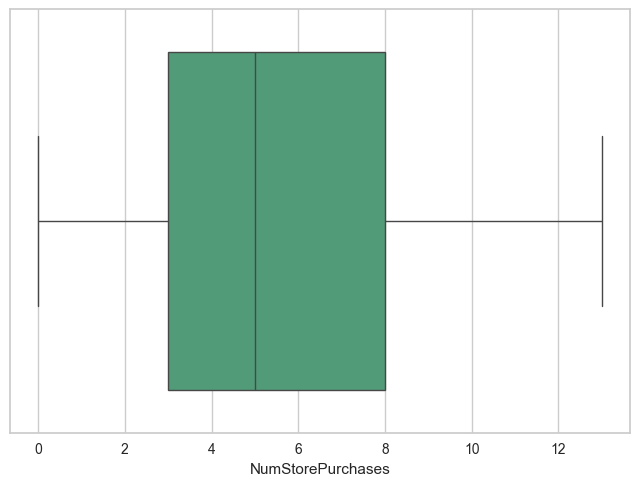

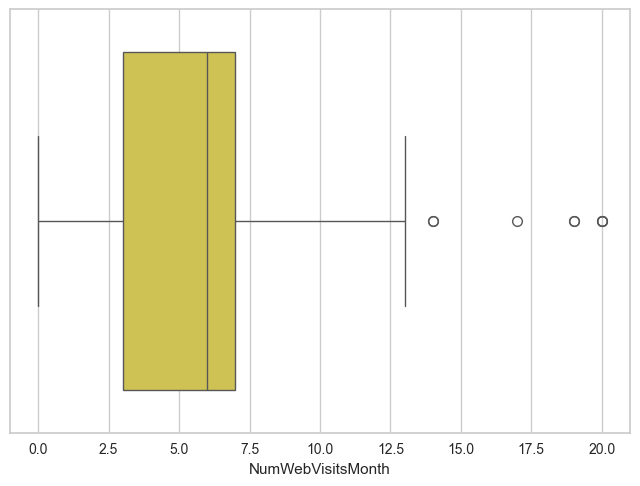

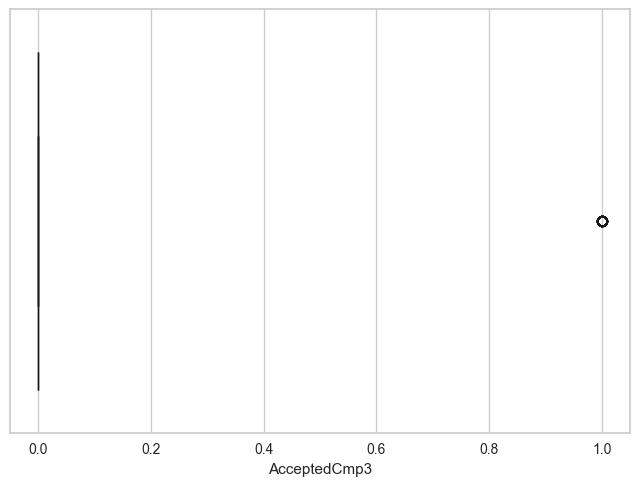

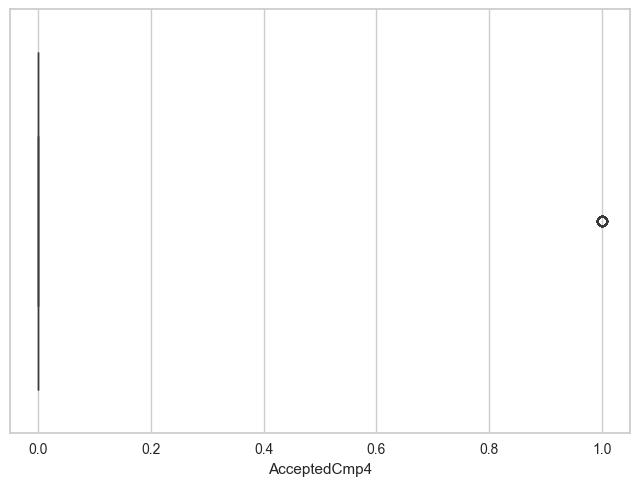

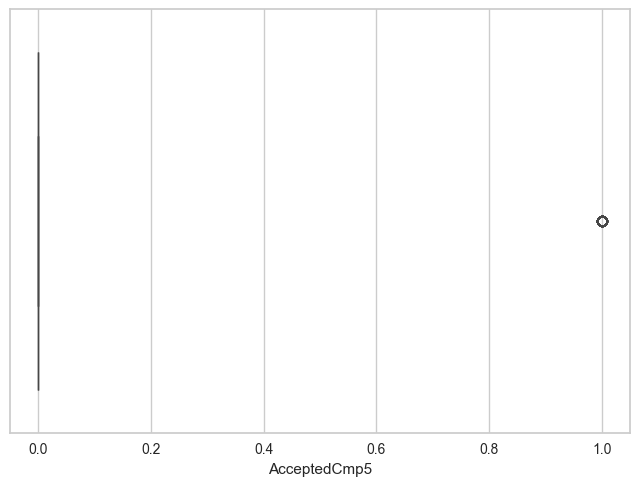

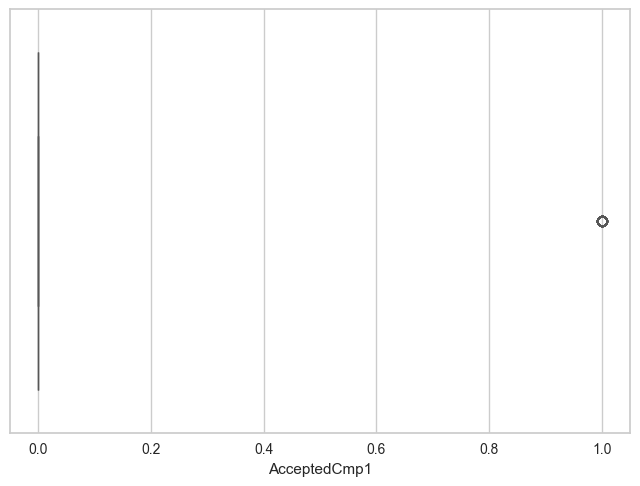

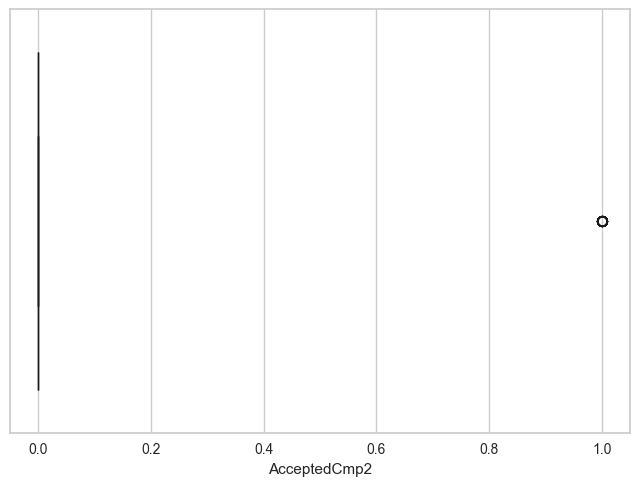

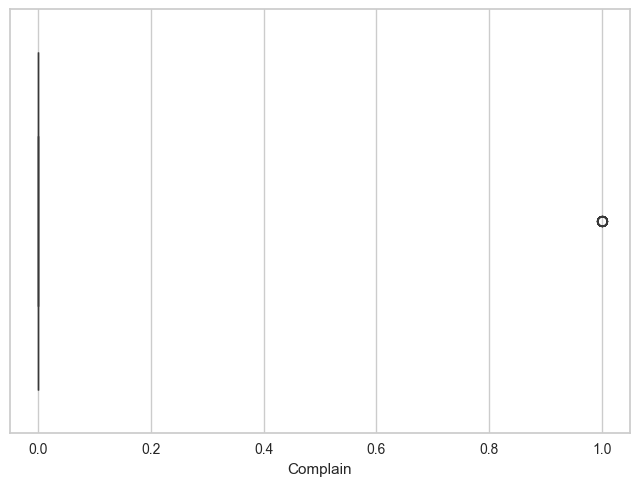

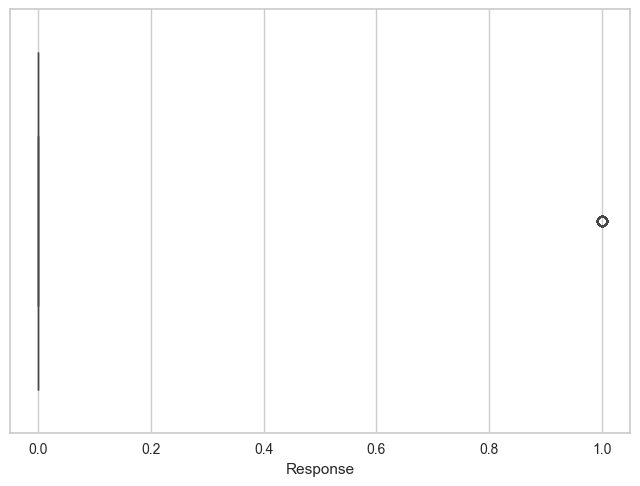

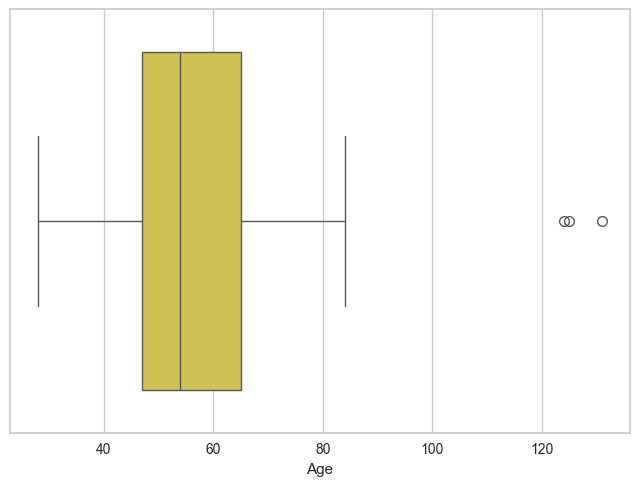

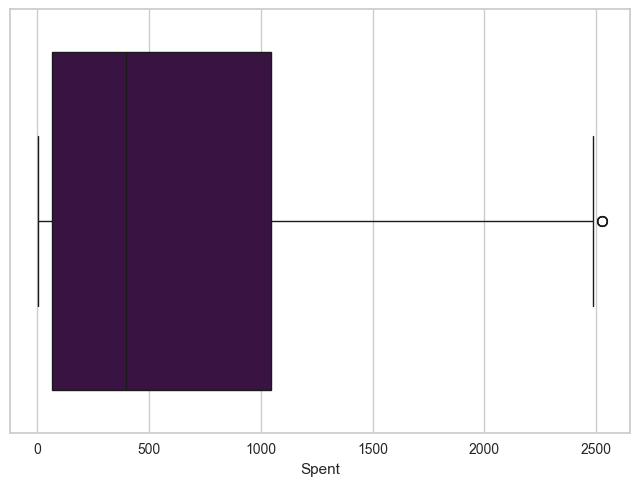

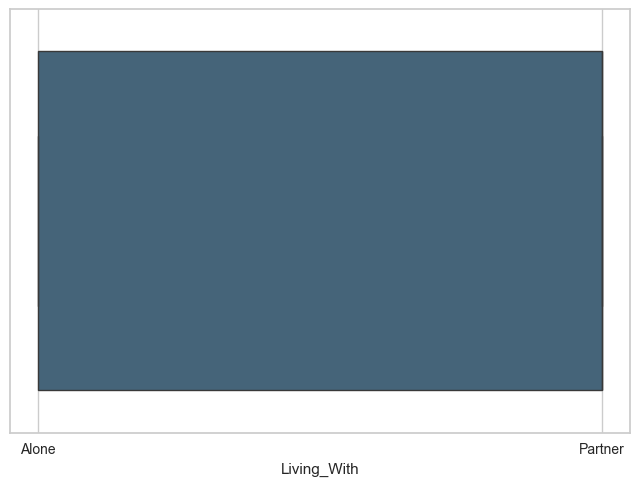

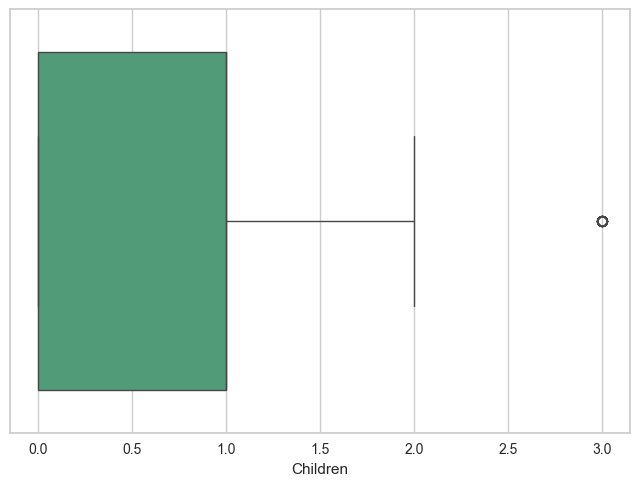

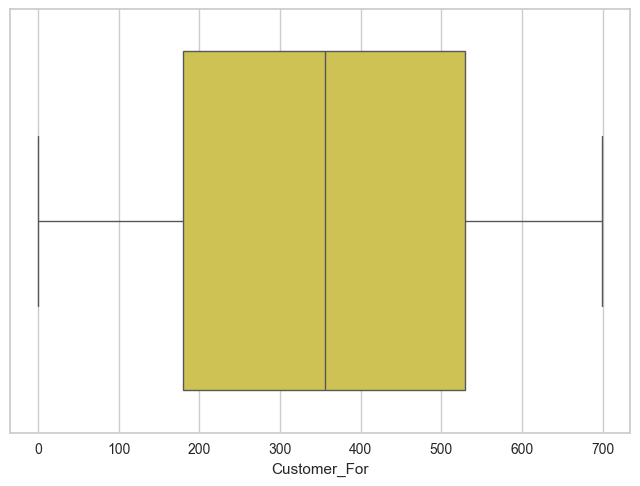

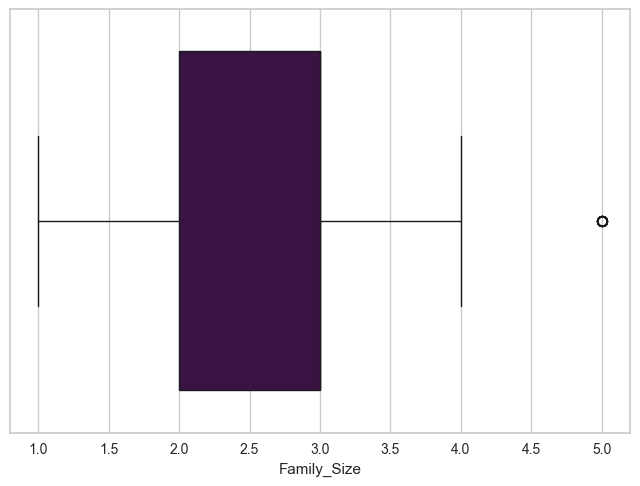

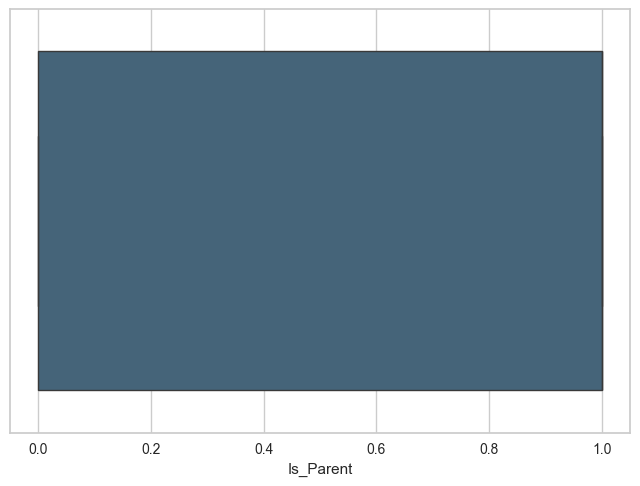

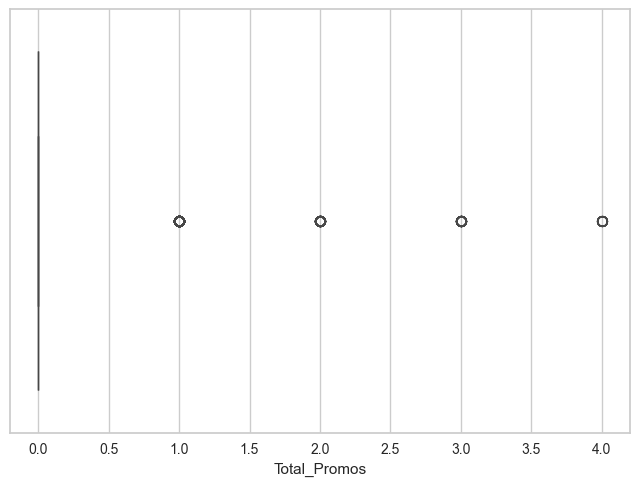

In [ ]:
#using boxplots to visualise the presence of outliers
colors = ["#3e0c4a", "#3c6682", "#45a778", "#e2d240"]
colors = colors*round(len(df.columns)/4)
count = 0
for column in df.columns:
    sns.boxplot(data=df, x=column, color=colors[count])
    plt.show()
    count+=1

In [ ]:
#removing outliers

df = df[df["Income"] < 600000]

df = df[df["Meat"] < 1600]

df = df[df["Sweets"] < 225]

df = df[df["Age"] < 90]

In [ ]:
#checking shape of data
df.shape

(2208, 31)

#### Encoding and Scaling the data

In [ ]:
#getting all categorical data
df_categoical = df.select_dtypes("object")
df_categoical.columns

Index(['Education', 'Living_With'], dtype='object')

In [ ]:
#labelencode the categorical data
LE = LabelEncoder()

for feature in df_categoical:
    df[feature] = LE.fit_transform(df[feature])

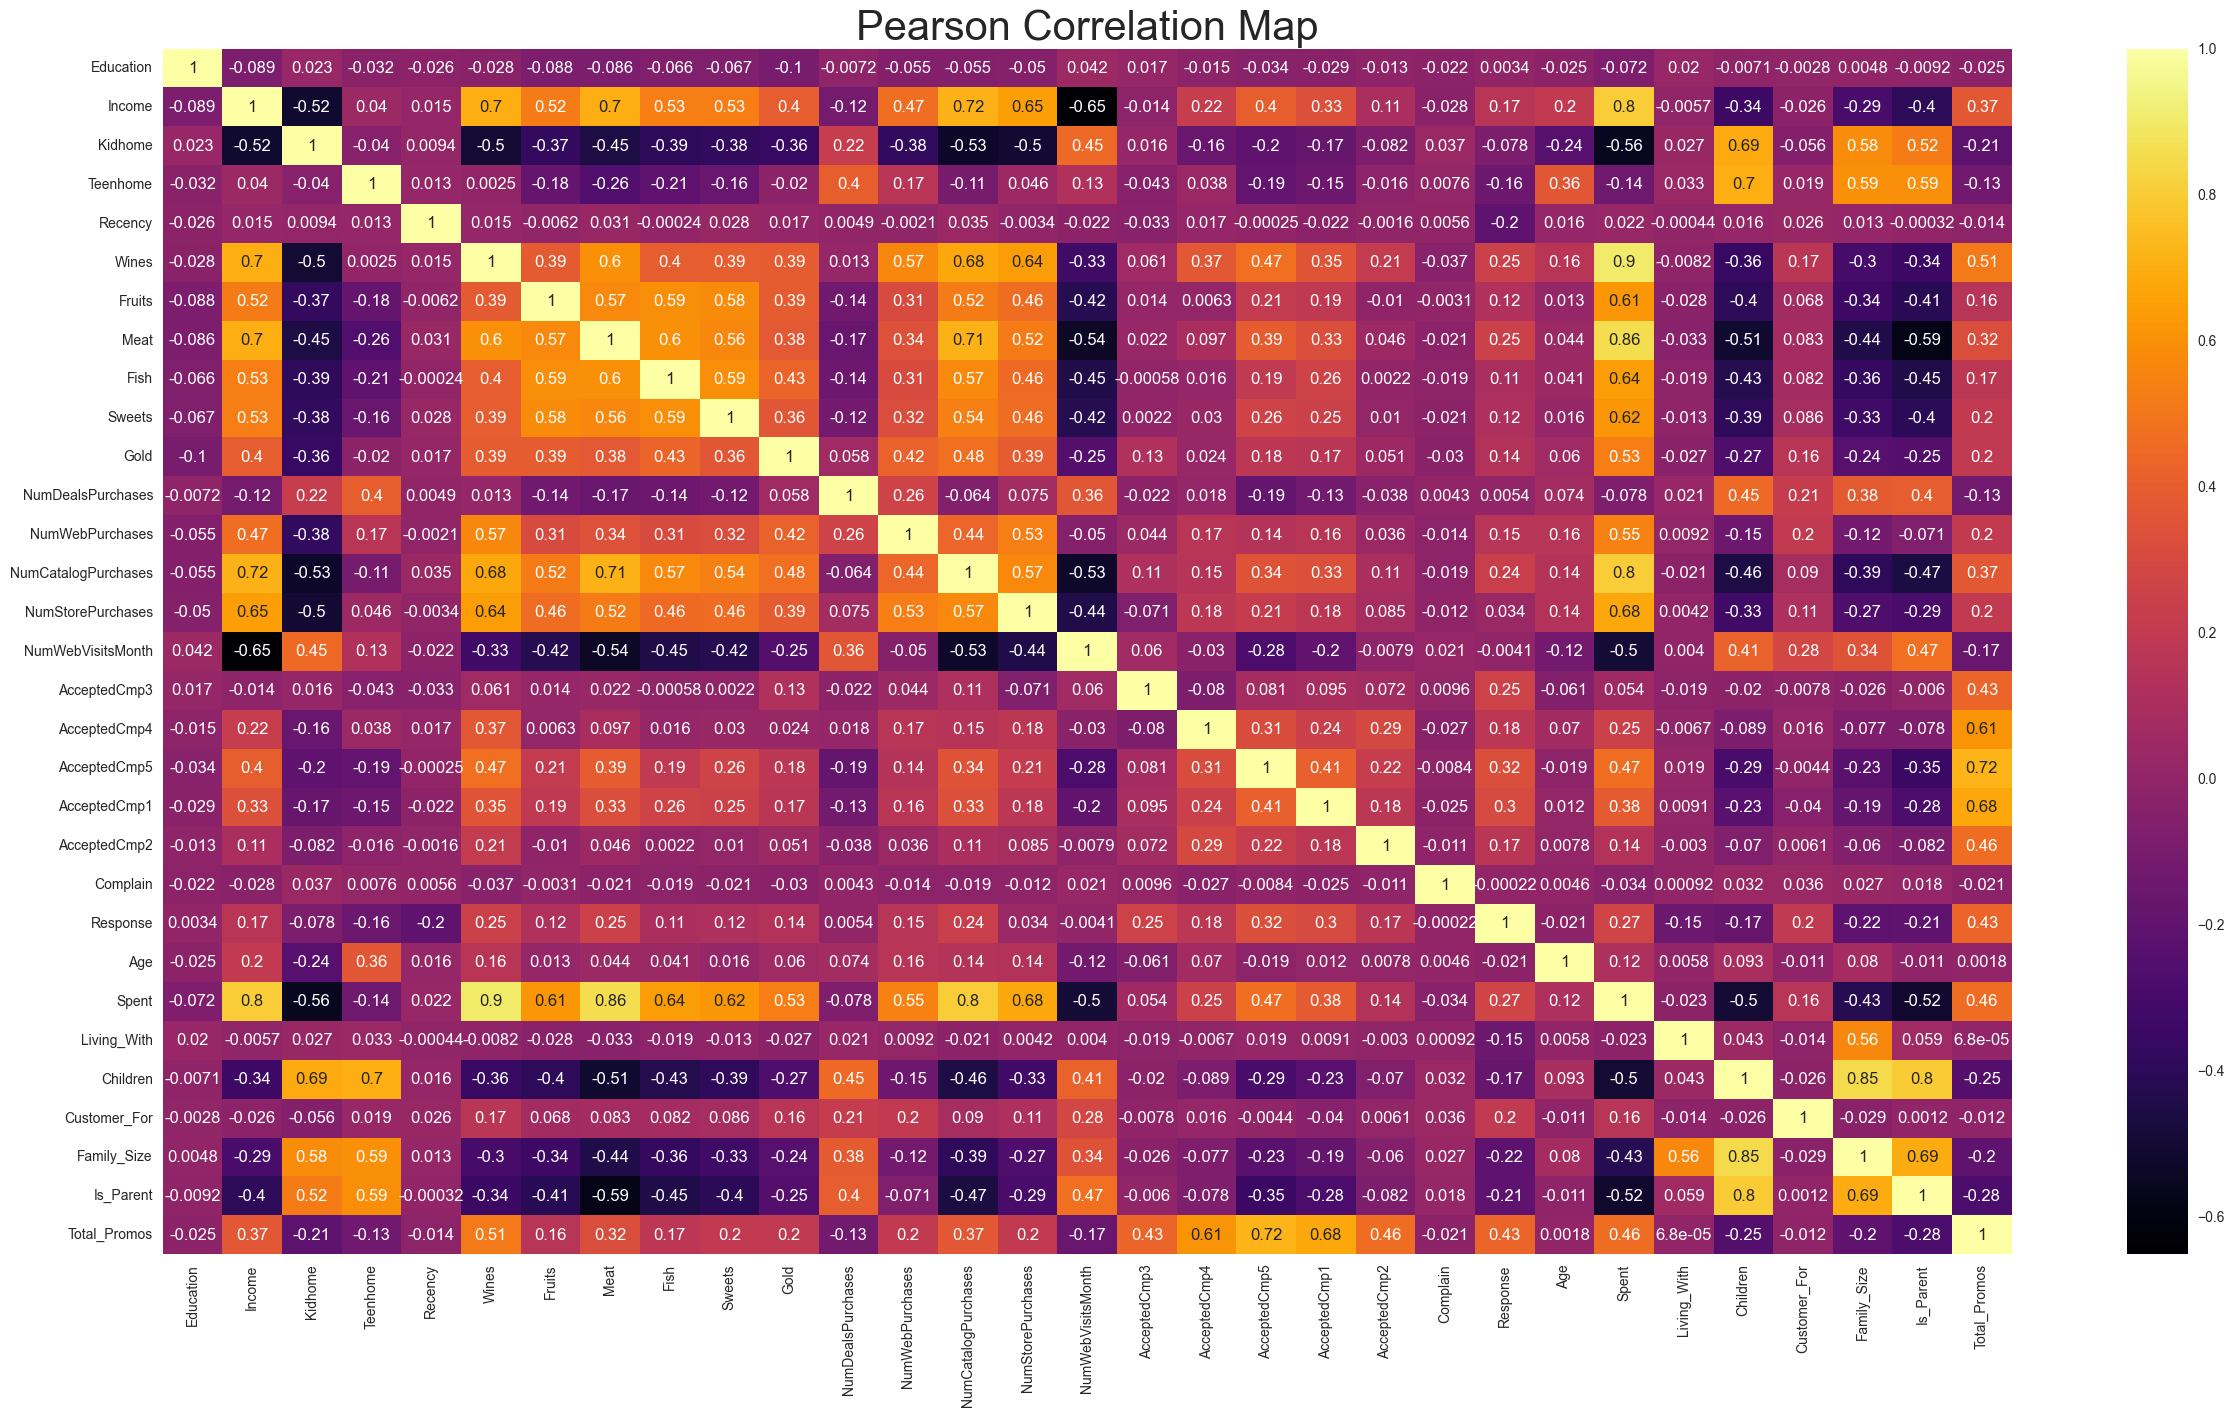

In [ ]:
#plotting heatmap
corrm = df.corr()
plt.figure(figsize=(25,14))
sns.heatmap(corrm, annot=True, cmap="inferno")
plt.tight_layout()
plt.title("Pearson Correlation Map", fontsize=30)
plt.show()

In [ ]:
#Creating a copy of data
df1 = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df1 = df.drop(cols_del, axis=1)

#Scaling using StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
scaled_df = pd.DataFrame(scaler.transform(df1), columns = df1.columns )
scaled_df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Customer_For,Family_Size,Is_Parent,Total_Promos
0,-0.893524,0.295849,-0.823235,-0.931270,0.308647,0.975877,1.550106,1.753820,2.450993,1.495612,...,-0.559899,0.690388,1.018679,1.681054,-1.349045,-1.266516,1.529141,-1.759606,-1.584403,-0.439634
1,-0.893524,-0.259615,1.039166,0.906303,-0.382592,-0.873970,-0.638054,-0.732131,-0.651701,-0.636587,...,-1.176332,-0.136281,1.275267,-0.962474,-1.349045,1.403143,-1.189017,0.447900,0.631152,-0.439634
2,-0.893524,0.930483,-0.823235,-0.931270,-0.797336,0.356297,0.569207,-0.175094,1.337673,-0.146427,...,1.289401,-0.549615,0.334447,0.282811,0.741265,-1.266516,-0.205538,-0.655853,-1.584403,-0.439634
3,-0.893524,-1.187334,1.039166,-0.931270,-0.797336,-0.873970,-0.562600,-0.667680,-0.505692,-0.587571,...,-0.559899,0.277054,-1.290606,-0.919246,0.741265,0.068313,-1.060523,0.447900,0.631152,-0.439634
4,0.571139,0.303149,1.039166,-0.931270,1.552878,-0.393721,0.418299,-0.216526,0.151349,0.000622,...,0.056534,-0.136281,-1.034019,-0.305748,0.741265,0.068313,-0.951796,0.447900,0.631152,-0.439634


As we can see there are so many features in the dataframe and The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

In [ ]:
#Using PCA to reduce dimensions or features from 23 to 3
pca = PCA(n_components=3, random_state=42)
pca_ds = pd.DataFrame(pca.fit_transform(scaled_df), columns=["col_1","col_2", "col_3"])
pca_ds.head()

,col_1,col_2,col_3
0,4.941676,-0.174230,2.435391
1,-2.917737,0.019010,-1.541854
2,2.520850,-0.753149,-0.245320
3,-2.716167,-1.453155,-0.389069
4,-0.703871,0.199326,-0.142544


In [ ]:
pca_ds.describe()

,col_1,col_2,col_3
count,2.208000e+03,2.208000e+03,2.208000e+03
mean,-2.574430e-17,-3.861645e-17,-3.016910e-17
std,2.927791e+00,1.719387e+00,1.236212e+00
min,-6.018451e+00,-4.199149e+00,-3.670474e+00
25%,-2.583991e+00,-1.335365e+00,-8.615213e-01
50%,-8.188291e-01,-1.716631e-01,-6.212639e-02
75%,2.362715e+00,1.238502e+00,8.597162e-01
max,7.979772e+00,6.207308e+00,6.806781e+00


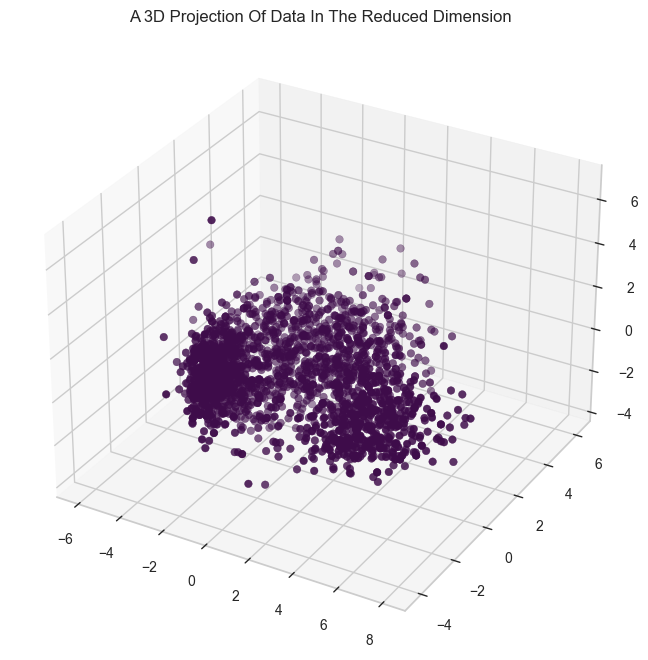

In [ ]:
# 3D Projection Of Data In The Reduced Dimension

x =pca_ds["col_1"]
y =pca_ds["col_2"]
z =pca_ds["col_3"]

plt.figure(figsize=(8,12))
ax = plt.axes(projection="3d")
fg = ax.scatter3D(x, y, z, s=30, c="#3e0c4a")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

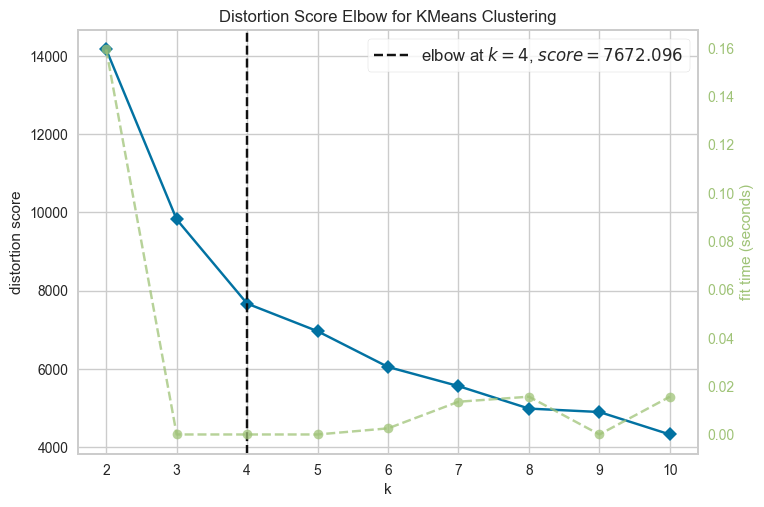

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_ds)
Elbow_M.show()

In [ ]:
#using kmeans clustering
kmeans = KMeans(4,random_state=42)
# fit model and predict clusters
clusters = kmeans.fit_predict(pca_ds)
pca_ds["Clusters"] = clusters
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= clusters

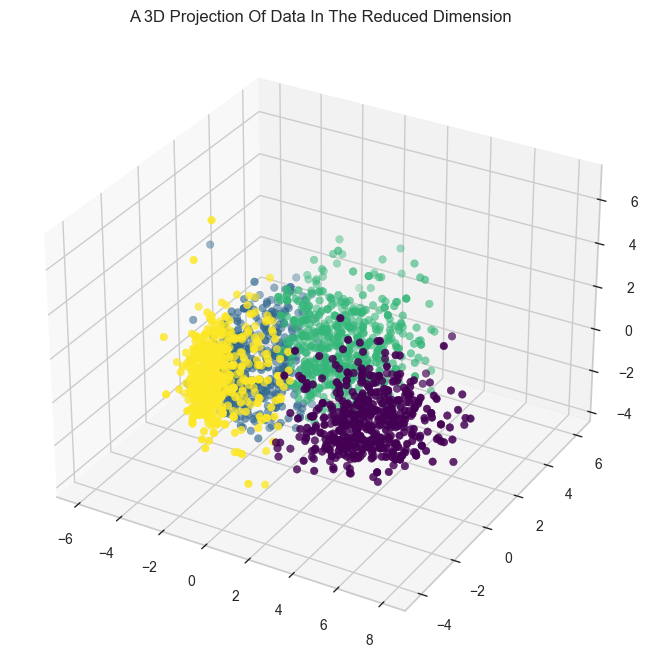

In [ ]:
#Plotting the clusters
cmap = plt.get_cmap("viridis")
plt.figure(figsize=(8,12))
ax = plt.axes(projection="3d")
fg = ax.scatter3D(x, y, z,  s=30, c=pca_ds["Clusters"], cmap = cmap)
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

   Clusters  count
0         0    498
1         1    552
2         2    547
3         3    611


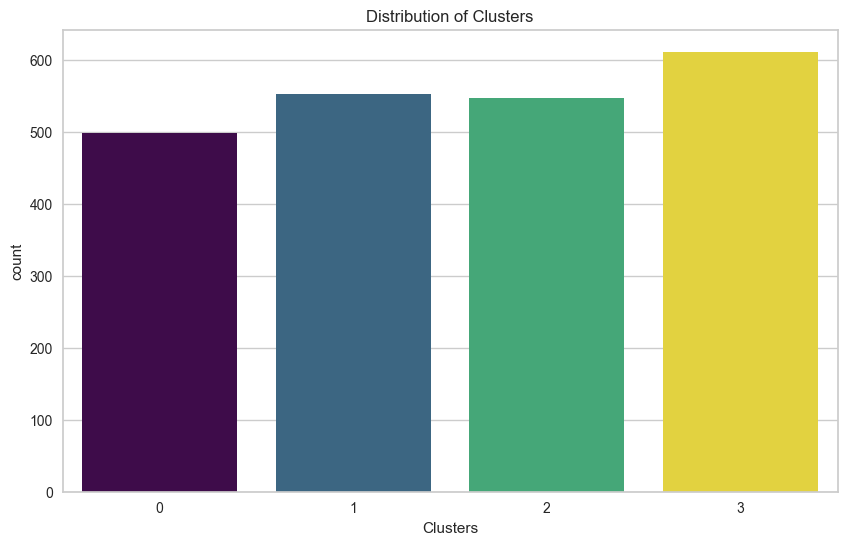

In [ ]:
#count of clusters values
print(df["Clusters"].value_counts().reset_index().sort_values(by="Clusters").reset_index(drop=True))

#plotting countplot of clusters
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Clusters", hue="Clusters", palette="viridis", legend=False)
plt.title("Distribution of Clusters")
plt.show()

Through countplot its clearly visible that cluster '0' have lowest no. of customers(498), clusters '1', '2' have medium no. of customers (552), (547) respectively and cluster '3' have the highest no. of customers(611).

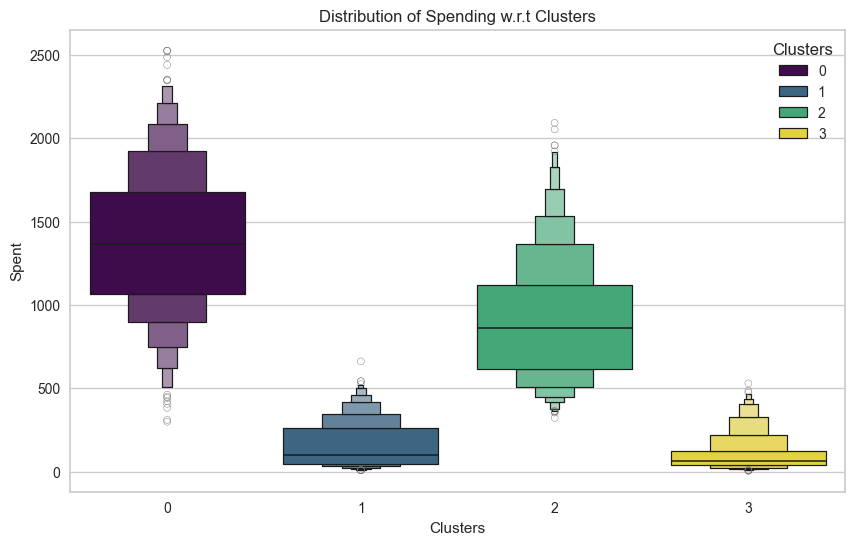

In [ ]:
#boxenplot to show relation in spending and Clusters
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x="Clusters", y="Spent", palette="viridis", hue="Clusters")
plt.title("Distribution of Spending w.r.t Clusters")
plt.show()

From the above Boxenplot we can see that Cluster 0 contains the highest spending customers, cluster 1 and 3 have the lowest spending customers and cluster 2 have average to high spendings.

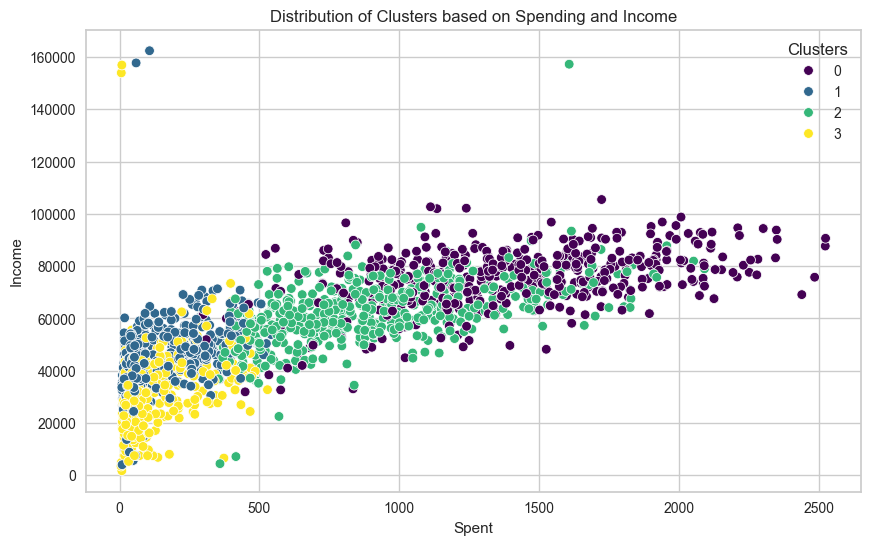

In [ ]:
#scatterplot to show relation in spending and Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Spent", y="Income", hue="Clusters", palette=cmap)
plt.title("Distribution of Clusters based on Spending and Income")
plt.show()

From the above scatterplot we get some really important insights:
* Group 0 : high spending and high income
* Group 1 : low spending and average income
* Group 2 : high spending and average-high income
* Group 3 : low spending and low income

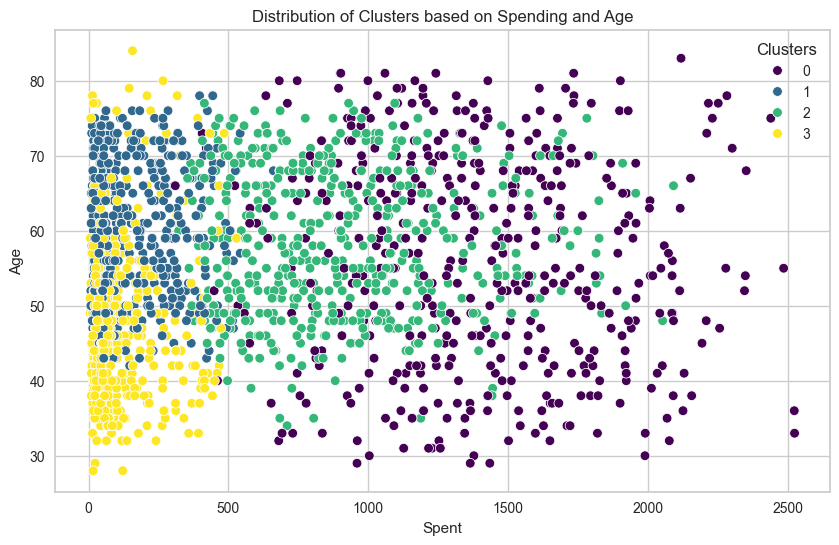

In [ ]:
#scatterplot to show relation in spending and age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Spent", y="Age", hue="Clusters", palette=cmap)
plt.title("Distribution of Clusters based on Spending and Age")
plt.show()

The above Scatterplot shows:
* Group 0 : The cluster spread all across all ages with high spending
* Group 1 : This cluster contains people of age mostly above 50 with low spending
* Group 2 : This cluster is spread between age 40-75 mosly with average to high spending
* Group 3 : This cluster covers almost all the age groups but most of the people have lower age and low spending.

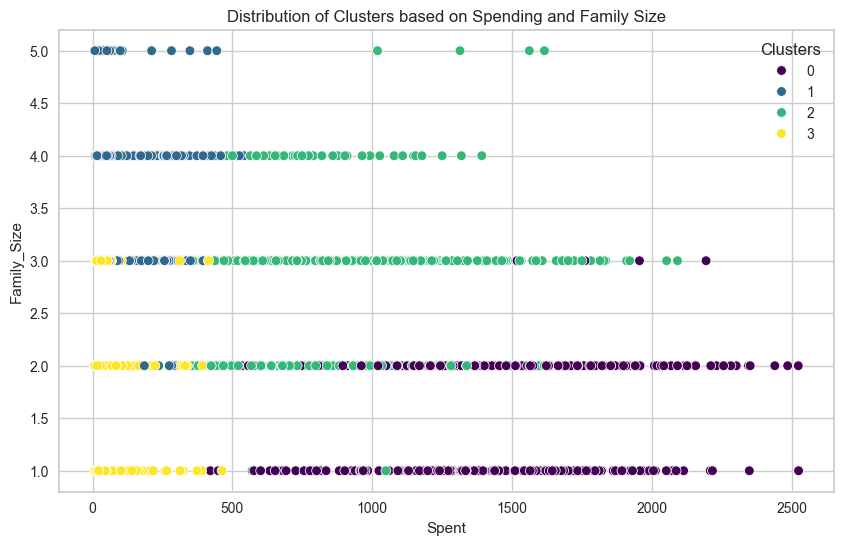

In [ ]:
#scatterplot to show relation in spending and Family_Size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Spent", y="Family_Size", hue="Clusters", palette=cmap)
plt.title("Distribution of Clusters based on Spending and Family Size")
plt.show()

The above scatterplot shows:
* Group 0 : small family size and high spending
* Group 1 : Large family size and low spending
* Group 2 : Average family size and average-high spending
* Group 3 : small family size and low spending

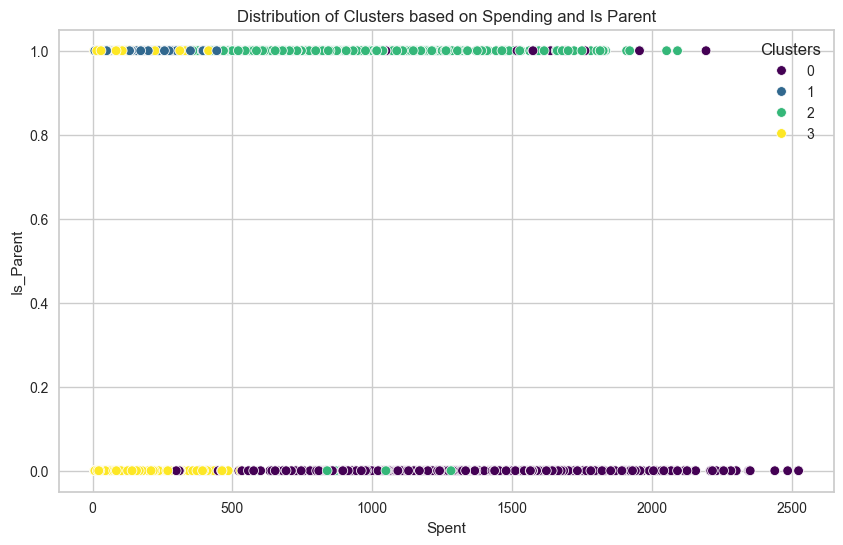

In [ ]:
#scatterplot to show relation in spending and is_parent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Spent", y="Is_Parent", hue="Clusters", palette=cmap)
plt.title("Distribution of Clusters based on Spending and Is Parent")
plt.show()

The above scatterplot shows:
* Group 0 : Not a Parent and high spending
* Group 1 : Is parent and low spending
* Group 2 : Is parent and average-high spending
* Group 3 : Not a Parent and low spending

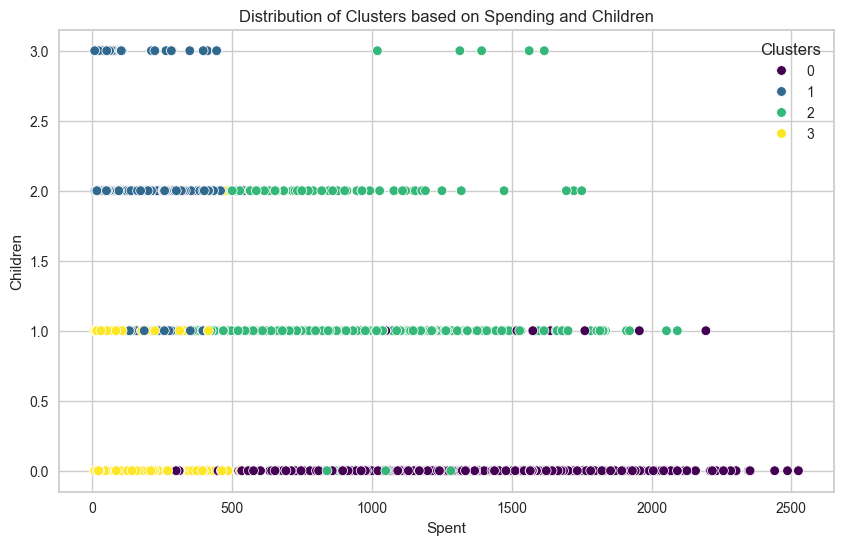

In [ ]:
#scatterplot to show relation in spending and Children
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Spent", y="Children", hue="Clusters", palette=cmap)
plt.title("Distribution of Clusters based on Spending and Children")
plt.show()

The above scatterplot shows:
* Group 0 : Have no Children and high spending
* Group 1 : Have 2-3 Children and low spending
* Group 2 : Have 1-2 Children and average-high spending
* Group 3 : Have 1 Children or none and low spending

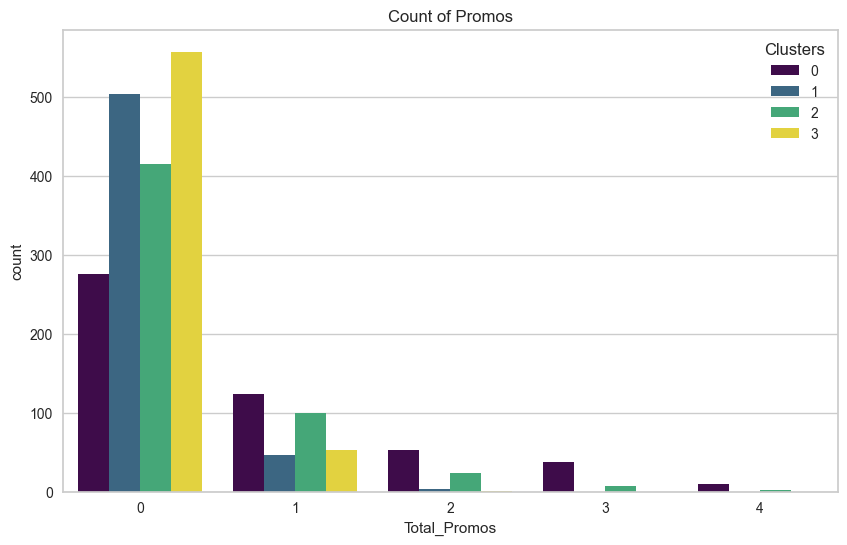

In [ ]:
#countplot to show total promos by each cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Total_Promos", palette="viridis", hue="Clusters")
plt.title("Count of Promos")
plt.show()

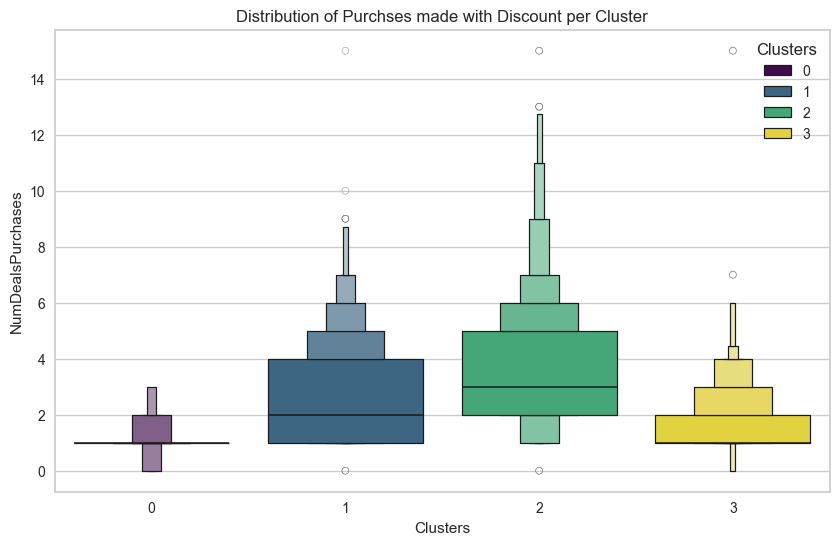

In [ ]:
# plotting Number of purchases made with a discount
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x="Clusters", y="NumDealsPurchases", palette="viridis", hue="Clusters")
plt.title("Distribution of Purchses made with Discount per Cluster")
plt.show()

The above boxenplot shows that the
* cluster 0 made less no. of purchases with discount
* cluster 1 made high no. of purchases with discount
* cluster 2 made highest no. of purchases with discount
* cluster 3 made average no. of purchases with discount

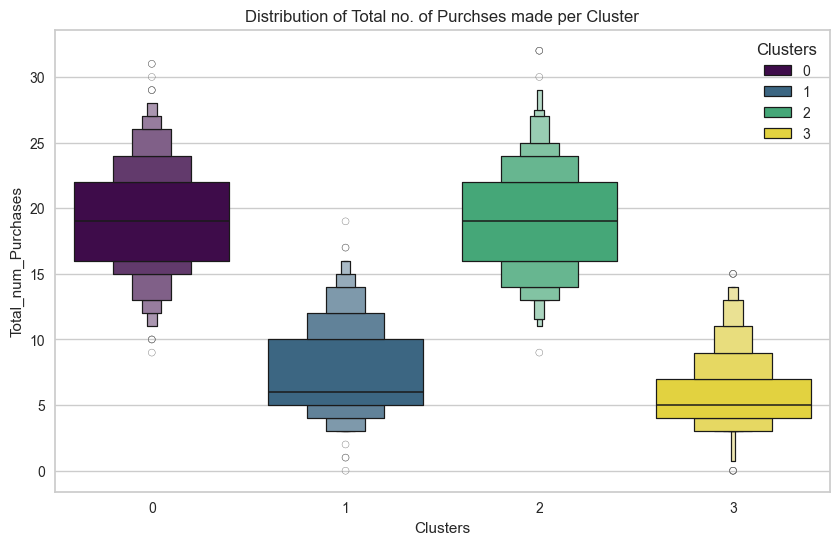

In [ ]:
#creating new column for total purchases from different places
df["Total_num_Purchases"] = df["NumCatalogPurchases"] + df["NumStorePurchases"] + df["NumWebPurchases"]

# plotting Number of purchases made with a discount
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df, x="Clusters", y="Total_num_Purchases", palette="viridis", hue="Clusters")
plt.title("Distribution of Total no. of Purchses made per Cluster")
plt.show()

From the above Boxenplot we can see that
* cluster 0 contains high no. of purchases
* cluster 1 less no. of purchases
* cluster 2 have high no. of purchases
* cluster 3 have lowest purchases.

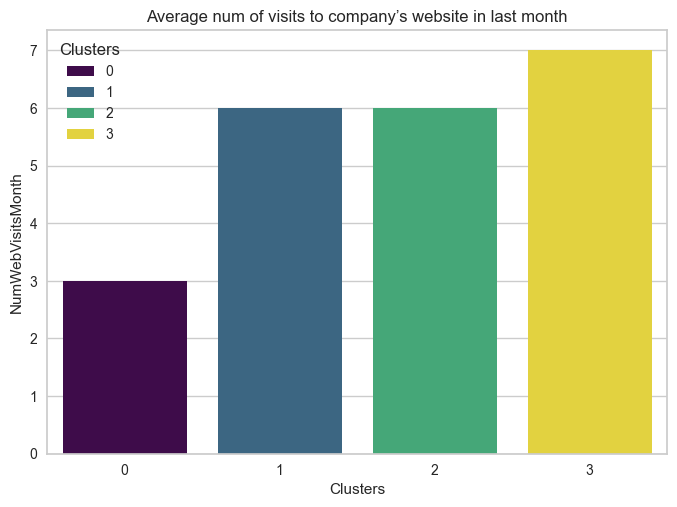

In [ ]:
#plotting barplot to show average visits to company's website in last month made by each cluster group
df_grouped = df[["NumWebVisitsMonth","Clusters"]].groupby(["Clusters"]).mean().reset_index()
df_grouped["NumWebVisitsMonth"] = round(df_grouped["NumWebVisitsMonth"])

sns.barplot(x="Clusters", y="NumWebVisitsMonth", data=df_grouped, hue="Clusters", palette="viridis")
plt.title("Average num of visits to company’s website in last month")
plt.show()

The above barplot shows that:
* customers in cluster 0 made lowest visits
* customers in cluster 1 made high visits
* customers in cluster 2 made high visits
* customers in cluster 3 made highest visits

#### Profiling the Clusters
Now that we have identified the clusters and analyzed their purchasing behaviors, it's time to profile the customers within each cluster. By doing so, we can determine who our star customers are and which individuals may require additional attention from the retail store's marketing team.

#### Cluster '0' :

* This cluster has a smaller number of customers.
* The highest spending customers are found in this cluster.
* These customers have high incomes and their spending is also high.
* All age groups are represented in this cluster.
* This cluster primarily consists of individuals or couples with a family size of 1-2, possibly indicating they are single also they are not parents.
* They make maximum purchases with least discount availed.
* The average number of visits to the website is also the lowest compared to other clusters.




#### Cluster '1' :

* This cluster contain medium number of customers.
* Customers in this cluster have low spending habits.
* They have low spending and average income levels.
* This cluster mostly includes people aged above 50.
* Customers in this cluster have large family size of upto 5 members which is higher compared to other cluster.
* The customers in this cluster are likely parents.
* They typically have 2-3 children.
* These customers make high number of purchases with discount with smaller number of total purchases.
* The average number of visits to the website is also moderate.




#### Cluster '2' :

* This cluster contain medium number of customers.
* Customers in this cluster have average to high spending habits.
* They have high spending and average to high income levels.
* This cluster primarily includes people aged between 40 and 75.
* Average family size of 2-4 members.
* Most customers in this cluster are parents.
* They typically have 1-2 children.
* Cluster 2 made the highest number of purchases with discounts.
* They have a high total number of purchases.
* Cluster 2 also has a high number of website visits in last month.




#### Cluster '3' :

* This cluster have the highest number of customers.
* It is the lowest spending cluster.
* Customers in this cluster have low spending and low income.
* This cluster covers almost all age groups, but most people are younger, with ages below 60.
* They have small family sizes.
* They are mostly not parents.
* They have one or no children.
* hey made an average number of purchases with discounts.
* They have the lowest total purchases.
* Made the highest number of visits to the company's website in the last month.

### Conclusion and Recommendations for the Marketing Team


Based on the cluster analysis, here are specific recommendations to enhance your marketing strategies:

--------------------------------------
* ##### Cluster '0':

*Strategy:* Focus on premium, high-end products.

*Suggestions:*  Since these customers are high spenders with low discount availing, consider introducing exclusive, members-only offers or luxury product lines to maintain their loyalty. Given their low website engagement, targeted email campaigns or personalized offers could help in boosting online interaction.

--------------------------------------

* ##### Cluster '1':

*Strategy:* Tailor family-oriented promotions.

*Suggestions:*  This cluster is sensitive to discounts and has larger family sizes. Create bundled offers or discounts on family-centric products. Senior-focused marketing initiatives, such as loyalty programs or special discount days, could resonate well with this group.

--------------------------------------

* ##### Cluster '2':

*Strategy:* Leverage their high engagement for cross-selling.

*Suggestions:* With a strong affinity for discounts and high online engagement, use personalized marketing campaigns that highlight discounts on complementary products. Introduce loyalty programs that reward frequent purchases and website visits, encouraging even more interaction and spending.

--------------------------------------

* ##### Cluster '3':

*Strategy:* Convert high website visits into purchases.

*Suggestions:* This group is highly engaged online but makes the fewest purchases. Consider implementing limited-time offers, flash sales, or discounts on entry-level products to encourage more frequent buying. Additionally, leverage social media and digital ads to capture their attention and drive conversions.

--------------------------------------

By implementing these targeted strategies, the marketing team can better cater to the unique needs and behaviors of each customer segment, ultimately driving more effective engagement and sales.






